# 01. PyTorch Fundamentals 🔥

Welcome to PyTorch! Now that you understand what machine learning is, let's dive into the framework that will power your AI journey.

By the end of this notebook, you'll understand:

- 🔥 **What PyTorch is** and why it's amazing for machine learning
- 🏗️ **Tensors**: The fundamental building blocks of PyTorch
- ⚡ **Device management**: CPU vs GPU computation
- 🧮 **Basic tensor operations** and mathematics
- 📊 **Visualization** with PyTorch tensors
- 🚀 **Your first neural network** with PyTorch!

Let's get started! 🚀


## What is PyTorch? 🤔

PyTorch is like a **supercharged version of NumPy** designed specifically for machine learning. Think of it as:

### 🧮 NumPy + Superpowers = PyTorch

| Feature                      | NumPy        | PyTorch        |
| ---------------------------- | ------------ | -------------- |
| **Multi-dimensional arrays** | ✅ Arrays    | ✅ Tensors     |
| **Mathematical operations**  | ✅ Fast      | ✅ Even Faster |
| **GPU acceleration**         | ❌ CPU only  | ✅ GPU + CPU   |
| **Automatic gradients**      | ❌ Manual    | ✅ Automatic   |
| **Neural networks**          | 😰 Complex   | 😎 Easy        |
| **Deep learning**            | 💀 Very hard | 🚀 Built-in    |

### 🎯 Key PyTorch Concepts:

1. **Tensors**: Multi-dimensional arrays (like NumPy arrays, but better)
2. **Autograd**: Automatic differentiation (computes gradients for you)
3. **Neural Networks**: Pre-built components for deep learning
4. **GPU Support**: Lightning-fast computation on graphics cards
5. **Dynamic Graphs**: Flexible networks that can change during runtime


## Setting Up PyTorch 🛠️

Let's start by importing PyTorch and checking our setup:


In [21]:
# Import PyTorch and related libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, HTML

# Set style for better-looking plots
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

print("🔥 PyTorch Setup Information")
print("=" * 40)
print(f"PyTorch version: {torch.__version__}")

# Check device availability
print("\n💻 Available Devices:")
print(f"CPU: ✅ Always available")

# Check CUDA (NVIDIA GPU)
if torch.cuda.is_available():
    print(f"CUDA GPU: ✅ {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
else:
    print("CUDA GPU: ❌ Not available (CPU only)")

# Check MPS (Apple Silicon GPU)
if hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    print("MPS (Apple Silicon): ✅ Available")
else:
    print("MPS (Apple Silicon): ❌ Not available")

print("\n🎯 Ready to learn PyTorch!")

🔥 PyTorch Setup Information
PyTorch version: 2.7.1

💻 Available Devices:
CPU: ✅ Always available
CUDA GPU: ❌ Not available (CPU only)
MPS (Apple Silicon): ✅ Available

🎯 Ready to learn PyTorch!


## Device Management: CPU vs GPU ⚡

One of PyTorch's superpowers is the ability to run computations on different devices. Let's understand this:


In [22]:
# Let's determine the best device for our computations
def get_device():
    """Get the best available device for PyTorch computations"""
    if torch.cuda.is_available():
        device = torch.device("cuda")
        device_name = torch.cuda.get_device_name(0)
        device_type = "NVIDIA GPU"
    elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
        device = torch.device("mps")
        device_name = "Apple Silicon GPU"
        device_type = "Apple GPU"
    else:
        device = torch.device("cpu")
        device_name = "CPU"
        device_type = "CPU"

    return device, device_name, device_type


device, device_name, device_type = get_device()

print(f"🎯 Selected device: {device}")
print(f"📱 Device name: {device_name}")
print(f"⚡ Device type: {device_type}")

🎯 Selected device: mps
📱 Device name: Apple Silicon GPU
⚡ Device type: Apple GPU


In [23]:
# Create a simple tensor and move it to our device
x = torch.tensor([1, 2, 3, 4, 5], device=device)
print(f"\n🔢 Sample tensor: {x}")
print(f"📍 Tensor device: {x.device}")
print(f"🔍 Tensor dtype: {x.dtype}")
print(f"📏 Tensor shape: {x.shape}")

# Why device matters?
print("\n🚀 Why Device Selection Matters:")
if device.type == "cuda":
    print("✅ Using GPU: 10-100x faster for large computations!")
    print("⚡ Perfect for training neural networks")
elif device.type == "mps":
    print("✅ Using Apple Silicon: Efficient and fast!")
    print("🔋 Great balance of speed and power efficiency")
else:
    print("✅ Using CPU: Always works, good for learning")
    print("📚 Perfect for understanding concepts")


🔢 Sample tensor: tensor([1, 2, 3, 4, 5], device='mps:0')
📍 Tensor device: mps:0
🔍 Tensor dtype: torch.int64
📏 Tensor shape: torch.Size([5])

🚀 Why Device Selection Matters:
✅ Using Apple Silicon: Efficient and fast!
🔋 Great balance of speed and power efficiency


## Understanding Tensors 📊

**Tensors are the foundation of PyTorch.** Think of them as multi-dimensional arrays with superpowers!

### 🎯 Tensor Dimensions Explained:

- **0D Tensor (Scalar)**: A single number → `5`
- **1D Tensor (Vector)**: A list of numbers → `[1, 2, 3]`
- **2D Tensor (Matrix)**: A table of numbers → `[[1, 2], [3, 4]]`
- **3D Tensor**: A cube of numbers → Used for RGB images
- **4D Tensor**: Multiple cubes → Batch of images
- **nD Tensor**: As many dimensions as you need!

<img src="../09_images/01_tensors.png" alt="Tensor Dimensions" width="1000">


In [24]:
# 0D Tensor (Scalar)
scalar = torch.tensor(42)
print(f"0D Tensor (Scalar): {scalar}")
print(f"   Shape: {scalar.shape}, Dimensions: {scalar.ndim}")

0D Tensor (Scalar): 42
   Shape: torch.Size([]), Dimensions: 0


In [25]:
# 1D Tensor (Vector)
vector = torch.tensor([1, 2, 3, 4, 5])
print(f"\n1D Tensor (Vector): {vector}")
print(f"   Shape: {vector.shape}, Dimensions: {vector.ndim}")


1D Tensor (Vector): tensor([1, 2, 3, 4, 5])
   Shape: torch.Size([5]), Dimensions: 1


In [26]:
# 2D Tensor (Matrix)
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"\n2D Tensor (Matrix):\n{matrix}")
print(f"   Shape: {matrix.shape}, Dimensions: {matrix.ndim}")


2D Tensor (Matrix):
tensor([[1, 2, 3],
        [4, 5, 6]])
   Shape: torch.Size([2, 3]), Dimensions: 2


In [27]:
# 3D Tensor
tensor_3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(f"\n3D Tensor:\n{tensor_3d}")
print(f"   Shape: {tensor_3d.shape}, Dimensions: {tensor_3d.ndim}")


3D Tensor:
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
   Shape: torch.Size([2, 2, 2]), Dimensions: 3


## Creating Tensors 🏗️

There are many ways to create tensors in PyTorch. Let's explore the most common methods:


In [28]:
# 1. From Python lists
from_list = torch.tensor([1, 2, 3, 4, 5])
print(f"From list: {from_list}")

From list: tensor([1, 2, 3, 4, 5])


In [29]:
# 2. From NumPy arrays
numpy_array = np.array([1, 2, 3, 4, 5])
from_numpy = torch.from_numpy(numpy_array)
print(f"From NumPy: {from_numpy}")

From NumPy: tensor([1, 2, 3, 4, 5])


In [30]:
# 3. Filled with zeros
zeros_tensor = torch.zeros(3, 4)  # 3x4 matrix of zeros
print(f"Zeros tensor (3x4):\n{zeros_tensor}")

Zeros tensor (3x4):
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [31]:
# 4. Filled with ones
ones_tensor = torch.ones(2, 3)  # 2x3 matrix of ones
print(f"Ones tensor (2x3):\n{ones_tensor}")

Ones tensor (2x3):
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [32]:
# 5. Random numbers
random_tensor = torch.rand(2, 3)  # Random numbers between 0 and 1
print(f"Random tensor (2x3):\n{random_tensor}")

Random tensor (2x3):
tensor([[0.3329, 0.2069, 0.2815],
        [0.8387, 0.6445, 0.5448]])


In [33]:
# 6. Random integers
random_int = torch.randint(0, 10, (3, 3))  # Random integers 0-9
print(f"Random integers (3x3, 0-9):\n{random_int}")

Random integers (3x3, 0-9):
tensor([[3, 5, 3],
        [9, 6, 1],
        [7, 3, 6]])


In [34]:
# 7. Linear sequence
linear_seq = torch.arange(0, 10, 2)  # 0, 2, 4, 6, 8
print(f"Linear sequence (0 to 10, step 2): {linear_seq}")

Linear sequence (0 to 10, step 2): tensor([0, 2, 4, 6, 8])


In [35]:
# 8. Linearly spaced
linspace = torch.linspace(0, 1, 5)  # 5 evenly spaced numbers from 0 to 1
print(f"Linspace (0 to 1, 5 points): {linspace}")

Linspace (0 to 1, 5 points): tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


In [36]:
# 9. Like another tensor (same shape)
template = torch.tensor([[1, 2], [3, 4]])
zeros_like = torch.zeros_like(template)
ones_like = torch.ones_like(template)
print(f"Template tensor:\n{template}")
print(f"Zeros like template:\n{zeros_like}")
print(f"Ones like template:\n{ones_like}")

Template tensor:
tensor([[1, 2],
        [3, 4]])
Zeros like template:
tensor([[0, 0],
        [0, 0]])
Ones like template:
tensor([[1, 1],
        [1, 1]])


## Tensor Properties and Information 🔍

Every tensor has important properties that tell us about its structure and data:


In [37]:
# Create a sample tensor for demonstration
sample_tensor = torch.randn(3, 4, 5)  # Random tensor with shape (3, 4, 5)

print("🔍 Tensor Properties")
print("=" * 30)

print(f"Tensor: Random tensor with shape (3, 4, 5)")
print(f"Shape: {sample_tensor.shape} or {sample_tensor.size()}")
print(f"Number of dimensions: {sample_tensor.ndim}")
print(f"Total number of elements: {sample_tensor.numel()}")
print(f"Data type: {sample_tensor.dtype}")
print(f"Device: {sample_tensor.device}")
print(f"Requires gradient: {sample_tensor.requires_grad}")

# Shape explanation
print("\n📏 Understanding Shape:")
print(f"Shape {sample_tensor.shape} means:")
print(f"  - 3 'matrices' (first dimension)")
print(f"  - Each matrix has 4 rows (second dimension)")
print(f"  - Each row has 5 columns (third dimension)")

🔍 Tensor Properties
Tensor: Random tensor with shape (3, 4, 5)
Shape: torch.Size([3, 4, 5]) or torch.Size([3, 4, 5])
Number of dimensions: 3
Total number of elements: 60
Data type: torch.float32
Device: cpu
Requires gradient: False

📏 Understanding Shape:
Shape torch.Size([3, 4, 5]) means:
  - 3 'matrices' (first dimension)
  - Each matrix has 4 rows (second dimension)
  - Each row has 5 columns (third dimension)


In [38]:
# Common data types
print("\n🔢 Common PyTorch Data Types:")
types_demo = {
    "torch.float32 (default)": torch.tensor([1.0, 2.0]),
    "torch.int64": torch.tensor([1, 2]),
    "torch.bool": torch.tensor([True, False]),
    "torch.float16 (half precision)": torch.tensor([1.0, 2.0], dtype=torch.float16),
}

for name, tensor in types_demo.items():
    print(f"  {name}: {tensor} (dtype: {tensor.dtype})")

print("\n💡 Pro Tip: Different data types use different amounts of memory!")
print("   float32 = 4 bytes per number")
print("   float16 = 2 bytes per number (saves memory!)")
print("   int64 = 8 bytes per number")


🔢 Common PyTorch Data Types:
  torch.float32 (default): tensor([1., 2.]) (dtype: torch.float32)
  torch.int64: tensor([1, 2]) (dtype: torch.int64)
  torch.bool: tensor([ True, False]) (dtype: torch.bool)
  torch.float16 (half precision): tensor([1., 2.], dtype=torch.float16) (dtype: torch.float16)

💡 Pro Tip: Different data types use different amounts of memory!
   float32 = 4 bytes per number
   float16 = 2 bytes per number (saves memory!)
   int64 = 8 bytes per number


## Basic Tensor Operations 🧮

Now let's learn the fundamental operations you can perform with tensors:


In [39]:
print("🧮 Basic Tensor Operations")
print("=" * 30)

# Create some sample tensors
a = torch.tensor([1, 2, 3, 4])
b = torch.tensor([5, 6, 7, 8])
matrix_a = torch.tensor([[1, 2], [3, 4]])
matrix_b = torch.tensor([[5, 6], [7, 8]])

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")
print()

# Arithmetic operations
print("➕ Arithmetic Operations:")
print(f"Addition: {a} + {b} = {a + b}")
print(f"Subtraction: {a} - {b} = {a - b}")
print(f"Multiplication: {a} * {b} = {a * b}")
print(f"Division: {a} / {b} = {a / b}")
print(f"Power: {a} ** 2 = {a ** 2}")

print("\n🔢 Statistical Operations:")
print(f"Sum: {a.sum()}")
print(f"Mean: {a.float().mean():.2f}")
print(f"Max: {a.max()}")
print(f"Min: {a.min()}")
print(f"Standard deviation: {a.float().std():.2f}")

print("\n🔄 Matrix Operations:")
print(f"Matrix A:\n{matrix_a}")
print(f"Matrix B:\n{matrix_b}")
print(f"\nMatrix multiplication:\n{torch.matmul(matrix_a, matrix_b)}")
print(f"\nTranspose of A:\n{matrix_a.T}")

# Element-wise vs matrix multiplication
print("\n⚡ Element-wise vs Matrix Multiplication:")
print(f"Element-wise (A * B):\n{matrix_a * matrix_b}")
print(f"Matrix multiplication (A @ B):\n{matrix_a @ matrix_b}")

print("\n💡 Key Difference:")
print("   * : Element-wise (each element multiplied independently)")
print("   @ : Matrix multiplication (linear algebra rules)")

🧮 Basic Tensor Operations
Tensor a: tensor([1, 2, 3, 4])
Tensor b: tensor([5, 6, 7, 8])

➕ Arithmetic Operations:
Addition: tensor([1, 2, 3, 4]) + tensor([5, 6, 7, 8]) = tensor([ 6,  8, 10, 12])
Subtraction: tensor([1, 2, 3, 4]) - tensor([5, 6, 7, 8]) = tensor([-4, -4, -4, -4])
Multiplication: tensor([1, 2, 3, 4]) * tensor([5, 6, 7, 8]) = tensor([ 5, 12, 21, 32])
Division: tensor([1, 2, 3, 4]) / tensor([5, 6, 7, 8]) = tensor([0.2000, 0.3333, 0.4286, 0.5000])
Power: tensor([1, 2, 3, 4]) ** 2 = tensor([ 1,  4,  9, 16])

🔢 Statistical Operations:
Sum: 10
Mean: 2.50
Max: 4
Min: 1
Standard deviation: 1.29

🔄 Matrix Operations:
Matrix A:
tensor([[1, 2],
        [3, 4]])
Matrix B:
tensor([[5, 6],
        [7, 8]])

Matrix multiplication:
tensor([[19, 22],
        [43, 50]])

Transpose of A:
tensor([[1, 3],
        [2, 4]])

⚡ Element-wise vs Matrix Multiplication:
Element-wise (A * B):
tensor([[ 5, 12],
        [21, 32]])
Matrix multiplication (A @ B):
tensor([[19, 22],
        [43, 50]])

💡 K

## Tensor Manipulation and Reshaping 🔄

Often you'll need to change the shape of tensors. Let's learn how:


In [40]:
print("🔄 Tensor Manipulation and Reshaping")
print("=" * 40)

# Start with a simple tensor
original = torch.arange(12)  # [0, 1, 2, ..., 11]
print(f"Original tensor: {original}")
print(f"Shape: {original.shape}")

# Reshape operations
print("\n🔄 Reshaping Operations:")

# Reshape to 2D
reshaped_2d = original.reshape(3, 4)  # 3 rows, 4 columns
print(f"\nReshaped to 3x4:\n{reshaped_2d}")

# Reshape to 3D
reshaped_3d = original.reshape(2, 3, 2)  # 2 matrices, 3 rows, 2 columns
print(f"\nReshaped to 2x3x2:\n{reshaped_3d}")

# Using -1 (automatic dimension)
auto_reshape = original.reshape(-1, 4)  # PyTorch figures out the first dimension
print(f"\nAuto-reshape (-1, 4):\n{auto_reshape}")
print(f"PyTorch calculated first dimension as: {auto_reshape.shape[0]}")

# View vs Reshape
print("\n👀 View vs Reshape:")
viewed = original.view(3, 4)
print(f"Using .view(3, 4):\n{viewed}")
print("💡 .view() and .reshape() often do the same thing")
print("   .view() is faster but requires contiguous memory")
print("   .reshape() always works but might copy data")

# Squeeze and unsqueeze
print("\n🗜️ Squeeze and Unsqueeze:")
with_extra_dim = torch.tensor([[[1, 2, 3]]])  # Shape: (1, 1, 3)
print(f"Tensor with extra dimensions: {with_extra_dim}")
print(f"Original shape: {with_extra_dim.shape}")

squeezed = with_extra_dim.squeeze()  # Remove dimensions of size 1
print(f"After squeeze(): {squeezed}")
print(f"Squeezed shape: {squeezed.shape}")

unsqueezed = squeezed.unsqueeze(0)  # Add dimension at position 0
print(f"After unsqueeze(0): {unsqueezed}")
print(f"Unsqueezed shape: {unsqueezed.shape}")

# Flatten
print("\n🎯 Flatten (very common in neural networks):")
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])
flattened = matrix.flatten()
print(f"Matrix:\n{matrix}")
print(f"Flattened: {flattened}")
print("💡 Flattening is crucial when going from Conv layers to Dense layers!")

🔄 Tensor Manipulation and Reshaping
Original tensor: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Shape: torch.Size([12])

🔄 Reshaping Operations:

Reshaped to 3x4:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Reshaped to 2x3x2:
tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]]])

Auto-reshape (-1, 4):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
PyTorch calculated first dimension as: 3

👀 View vs Reshape:
Using .view(3, 4):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
💡 .view() and .reshape() often do the same thing
   .view() is faster but requires contiguous memory
   .reshape() always works but might copy data

🗜️ Squeeze and Unsqueeze:
Tensor with extra dimensions: tensor([[[1, 2, 3]]])
Original shape: torch.Size([1, 1, 3])
After squeeze(): tensor([1, 2, 3])
Squeezed shape: torch.Size([3])
After unsquee

## Indexing and Slicing 🎯

Just like NumPy arrays, you can select specific elements or parts of tensors:


In [41]:
print("🎯 Tensor Indexing and Slicing")
print("=" * 35)

# Create a sample tensor
data = torch.arange(24).reshape(4, 6)  # 4x6 matrix
print(f"Sample tensor (4x6):\n{data}")

print("\n🔍 Basic Indexing:")
print(f"First row: {data[0]}")
print(f"Last row: {data[-1]}")
print(f"Element at position [1, 3]: {data[1, 3]}")
print(f"First element of each row: {data[:, 0]}")

print("\n✂️ Slicing:")
print(f"First 2 rows:\n{data[:2]}")
print(f"\nLast 3 columns:\n{data[:, -3:]}")
print(f"\nMiddle 2x3 submatrix:\n{data[1:3, 2:5]}")
print(f"\nEvery other row and column:\n{data[::2, ::2]}")

# Boolean indexing
print("\n🎭 Boolean Indexing:")
mask = data > 10
print(f"Elements greater than 10: {data[mask]}")
print(f"Number of elements > 10: {(data > 10).sum()}")

# Advanced indexing
print("\n🚀 Advanced Indexing:")
# Select specific rows and columns
rows = torch.tensor([0, 2, 3])
cols = torch.tensor([1, 3, 5])
selected = data[rows[:, None], cols]  # Broadcasting magic!
print(
    f"Selected elements from rows {rows.tolist()} and cols {cols.tolist()}:\n{selected}"
)

# Modify values
print("\n✏️ Modifying Values:")
data_copy = data.clone()  # Make a copy to avoid modifying original
data_copy[0, :] = 99  # Set first row to 99
data_copy[data_copy > 15] = 0  # Set all values > 15 to 0
print(f"After modifications:\n{data_copy}")

print("\n💡 Pro Tips:")
print("   - Use : for 'all' elements in a dimension")
print("   - Negative indices count from the end")
print("   - Boolean indexing is powerful for filtering")
print("   - Always .clone() if you don't want to modify the original!")

🎯 Tensor Indexing and Slicing
Sample tensor (4x6):
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])

🔍 Basic Indexing:
First row: tensor([0, 1, 2, 3, 4, 5])
Last row: tensor([18, 19, 20, 21, 22, 23])
Element at position [1, 3]: 9
First element of each row: tensor([ 0,  6, 12, 18])

✂️ Slicing:
First 2 rows:
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

Last 3 columns:
tensor([[ 3,  4,  5],
        [ 9, 10, 11],
        [15, 16, 17],
        [21, 22, 23]])

Middle 2x3 submatrix:
tensor([[ 8,  9, 10],
        [14, 15, 16]])

Every other row and column:
tensor([[ 0,  2,  4],
        [12, 14, 16]])

🎭 Boolean Indexing:
Elements greater than 10: tensor([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
Number of elements > 10: 13

🚀 Advanced Indexing:
Selected elements from rows [0, 2, 3] and cols [1, 3, 5]:
tensor([[ 1,  3,  5],
        [13, 15, 17],
        [19, 21, 23]])

✏️

## Working with Random Numbers 🎲

Random numbers are crucial in machine learning for initialization, sampling, and more:


🎲 Working with Random Numbers
🌱 Setting Random Seed (for reproducible results):
Random tensor 1: tensor([0.8823, 0.9150, 0.3829])
Random tensor 2: tensor([0.8823, 0.9150, 0.3829])
Are they equal? True

🎯 Different Random Distributions:
Uniform [0, 1): tensor([0.9593, 0.3904, 0.6009, 0.2566, 0.7936])
Normal (0, 1): tensor([-1.1229, -0.1863,  2.2082, -0.6380,  0.4617])
Normal (10, 2): tensor([10.5347, 11.0698, 11.6187, 12.2206,  6.6204])
Random dice rolls: tensor([2, 2, 1, 1, 2, 2, 6, 5, 6, 3])
Random permutation: tensor([2, 4, 1, 0, 5, 9, 3, 6, 7, 8])


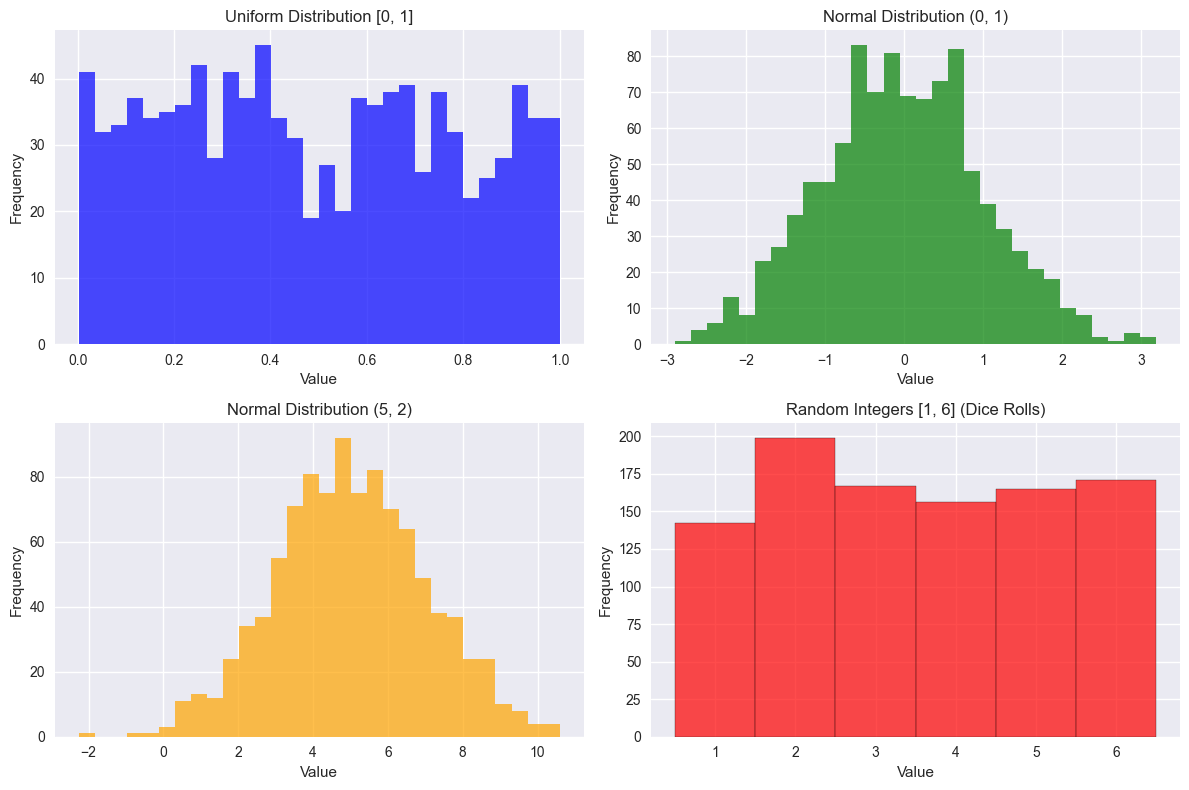


💡 Why Random Numbers Matter in ML:
   🎯 Initialize neural network weights
   🔀 Shuffle training data
   📊 Sample from datasets
   🎲 Add noise for regularization
   🧪 Create reproducible experiments (with seeds)


In [42]:
print("🎲 Working with Random Numbers")
print("=" * 32)

# Set seed for reproducibility
print("🌱 Setting Random Seed (for reproducible results):")
torch.manual_seed(42)
random1 = torch.rand(3)
print(f"Random tensor 1: {random1}")

torch.manual_seed(42)  # Same seed
random2 = torch.rand(3)
print(f"Random tensor 2: {random2}")
print(f"Are they equal? {torch.equal(random1, random2)}")

print("\n🎯 Different Random Distributions:")

# Uniform distribution [0, 1)
uniform = torch.rand(5)
print(f"Uniform [0, 1): {uniform}")

# Normal distribution (mean=0, std=1)
normal = torch.randn(5)
print(f"Normal (0, 1): {normal}")

# Custom normal distribution
custom_normal = torch.normal(mean=10, std=2, size=(5,))
print(f"Normal (10, 2): {custom_normal}")

# Random integers
random_ints = torch.randint(1, 7, (10,))  # Like rolling dice
print(f"Random dice rolls: {random_ints}")

# Random permutation
perm = torch.randperm(10)  # Random permutation of 0-9
print(f"Random permutation: {perm}")

# Let's visualize different distributions
torch.manual_seed(42)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Uniform distribution
uniform_samples = torch.rand(1000)
axes[0, 0].hist(uniform_samples.numpy(), bins=30, alpha=0.7, color="blue")
axes[0, 0].set_title("Uniform Distribution [0, 1]")
axes[0, 0].set_xlabel("Value")
axes[0, 0].set_ylabel("Frequency")

# Normal distribution
normal_samples = torch.randn(1000)
axes[0, 1].hist(normal_samples.numpy(), bins=30, alpha=0.7, color="green")
axes[0, 1].set_title("Normal Distribution (0, 1)")
axes[0, 1].set_xlabel("Value")
axes[0, 1].set_ylabel("Frequency")

# Custom normal distribution
custom_samples = torch.normal(5, 2, (1000,))
axes[1, 0].hist(custom_samples.numpy(), bins=30, alpha=0.7, color="orange")
axes[1, 0].set_title("Normal Distribution (5, 2)")
axes[1, 0].set_xlabel("Value")
axes[1, 0].set_ylabel("Frequency")

# Random integers (dice)
dice_rolls = torch.randint(1, 7, (1000,))
axes[1, 1].hist(
    dice_rolls.numpy(),
    bins=6,
    alpha=0.7,
    color="red",
    range=(0.5, 6.5),
    edgecolor="black",
)
axes[1, 1].set_title("Random Integers [1, 6] (Dice Rolls)")
axes[1, 1].set_xlabel("Value")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_xticks(range(1, 7))

plt.tight_layout()
plt.show()

print("\n💡 Why Random Numbers Matter in ML:")
print("   🎯 Initialize neural network weights")
print("   🔀 Shuffle training data")
print("   📊 Sample from datasets")
print("   🎲 Add noise for regularization")
print("   🧪 Create reproducible experiments (with seeds)")

## Your First Neural Network with PyTorch! 🚀

Now that you understand tensors, let's build something exciting - your very first neural network!


In [43]:
print("🚀 Building Your First Neural Network!")
print("=" * 40)

# Let's solve a simple problem: predict if a number is positive or negative
# This is obviously trivial, but it demonstrates the concepts!

import torch.nn as nn
import torch.optim as optim

# Step 1: Create training data
torch.manual_seed(42)
print("📊 Step 1: Create Training Data")

# Generate random numbers
X = torch.randn(1000, 1)  # 1000 random numbers
y = (X > 0).float()  # 1 if positive, 0 if negative

print(f"Training data shape: X={X.shape}, y={y.shape}")
print(f"Sample data points:")
for i in range(5):
    print(
        f"  x={X[i].item():.3f} → y={int(y[i].item())} ({'positive' if y[i] > 0 else 'negative'})"
    )

# Step 2: Define the neural network
print("\n🧠 Step 2: Define Neural Network Architecture")


class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        # One linear layer: input_size=1, output_size=1
        self.linear = nn.Linear(1, 1)
        # Sigmoid activation to get probability between 0 and 1
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)  # Linear transformation
        x = self.sigmoid(x)  # Sigmoid activation
        return x


# Create the network
model = SimpleNet()
print(f"Network architecture:")
print(model)

# Check initial parameters
for name, param in model.named_parameters():
    print(f"  {name}: {param.data}")

# Step 3: Define loss function and optimizer
print("\n⚙️ Step 3: Set up Training Components")
criterion = nn.BCELoss()  # Binary Cross Entropy for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent

print(f"Loss function: {criterion}")
print(f"Optimizer: {optimizer}")

# Step 4: Training loop
print("\n🏋️ Step 4: Train the Neural Network")

losses = []
accuracies = []

for epoch in range(100):
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)

    # Backward pass
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Calculate accuracy
    predicted_classes = (predictions > 0.5).float()
    accuracy = (predicted_classes == y).float().mean()

    losses.append(loss.item())
    accuracies.append(accuracy.item())

    if epoch % 20 == 0 or epoch == 99:
        print(
            f"Epoch {epoch:3d}: Loss = {loss.item():.4f}, Accuracy = {accuracy.item():.4f}"
        )

print("\n🎉 Training completed!")

🚀 Building Your First Neural Network!
📊 Step 1: Create Training Data
Training data shape: X=torch.Size([1000, 1]), y=torch.Size([1000, 1])
Sample data points:
  x=1.927 → y=1 (positive)
  x=1.487 → y=1 (positive)
  x=0.901 → y=1 (positive)
  x=-2.106 → y=0 (negative)
  x=0.678 → y=1 (positive)

🧠 Step 2: Define Neural Network Architecture
Network architecture:
SimpleNet(
  (linear): Linear(in_features=1, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
  linear.weight: tensor([[-0.7024]])
  linear.bias: tensor([0.3192])

⚙️ Step 3: Set up Training Components
Loss function: BCELoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

🏋️ Step 4: Train the Neural Network
Epoch   0: Loss = 1.0432, Accuracy = 0.1780
Epoch  20: Loss = 0.6193, Accuracy = 0.6600
Epoch  40: Loss = 0.4540, Accuracy = 0.9340
Epoch  60: Loss = 0.3750, Accuracy =

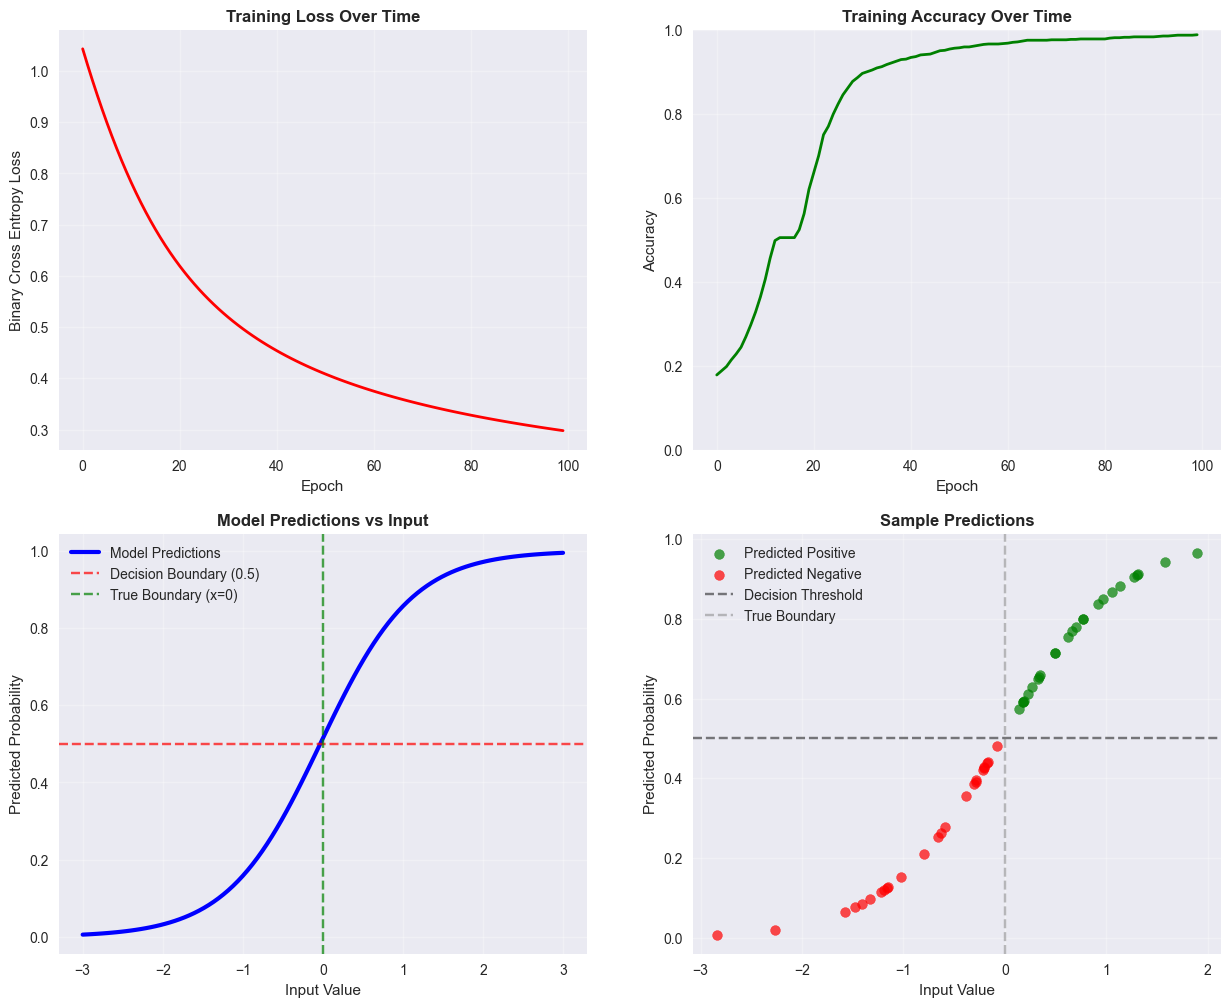


🔍 Final Model Parameters:
  linear.weight: 1.7291
  linear.bias: 0.0569

🎯 Final Results:
  Loss: 0.2980
  Accuracy: 0.9880 (98.8%)

🧪 Testing on New Data:
  Input:  -2.5 → Probability: 0.014 → Negative ✅
  Input:  -1.0 → Probability: 0.158 → Negative ✅
  Input:   0.5 → Probability: 0.715 → Positive ✅
  Input:   2.0 → Probability: 0.971 → Positive ✅

🎉 Congratulations! You've built and trained your first neural network!


In [44]:
# Let's visualize the training progress and results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Training loss
ax1.plot(losses, color="red", linewidth=2)
ax1.set_title("Training Loss Over Time", fontweight="bold")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Binary Cross Entropy Loss")
ax1.grid(True, alpha=0.3)

# Plot 2: Training accuracy
ax2.plot(accuracies, color="green", linewidth=2)
ax2.set_title("Training Accuracy Over Time", fontweight="bold")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3)

# Plot 3: Model predictions vs actual
with torch.inference_mode():
    test_range = torch.linspace(-3, 3, 100).unsqueeze(1)
    test_predictions = model(test_range)

ax3.plot(
    test_range.numpy(),
    test_predictions.numpy(),
    "b-",
    linewidth=3,
    label="Model Predictions",
)
ax3.axhline(
    y=0.5, color="red", linestyle="--", alpha=0.7, label="Decision Boundary (0.5)"
)
ax3.axvline(x=0, color="green", linestyle="--", alpha=0.7, label="True Boundary (x=0)")
ax3.set_title("Model Predictions vs Input", fontweight="bold")
ax3.set_xlabel("Input Value")
ax3.set_ylabel("Predicted Probability")
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Sample predictions
torch.manual_seed(123)
test_samples = torch.randn(50, 1)
with torch.inference_mode():
    sample_predictions = model(test_samples)
    sample_classes = (sample_predictions > 0.5).float()

# Separate positive and negative predictions
pos_mask = sample_classes.squeeze() == 1
neg_mask = sample_classes.squeeze() == 0

ax4.scatter(
    test_samples[pos_mask],
    sample_predictions[pos_mask],
    color="green",
    alpha=0.7,
    s=50,
    label="Predicted Positive",
)
ax4.scatter(
    test_samples[neg_mask],
    sample_predictions[neg_mask],
    color="red",
    alpha=0.7,
    s=50,
    label="Predicted Negative",
)
ax4.axhline(y=0.5, color="black", linestyle="--", alpha=0.5, label="Decision Threshold")
ax4.axvline(x=0, color="gray", linestyle="--", alpha=0.5, label="True Boundary")
ax4.set_title("Sample Predictions", fontweight="bold")
ax4.set_xlabel("Input Value")
ax4.set_ylabel("Predicted Probability")
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.show()

# Final model parameters
print("\n🔍 Final Model Parameters:")
for name, param in model.named_parameters():
    print(f"  {name}: {param.data.item():.4f}")

print(f"\n🎯 Final Results:")
print(f"  Loss: {losses[-1]:.4f}")
print(f"  Accuracy: {accuracies[-1]:.4f} ({accuracies[-1]*100:.1f}%)")

# Test on new data
print("\n🧪 Testing on New Data:")
test_values = [-2.5, -1.0, 0.5, 2.0]
with torch.inference_mode():
    for val in test_values:
        input_tensor = torch.tensor([[val]])
        prediction = model(input_tensor)
        predicted_class = "Positive" if prediction > 0.5 else "Negative"
        actual_class = "Positive" if val > 0 else "Negative"
        correct = "✅" if predicted_class == actual_class else "❌"
        print(
            f"  Input: {val:5.1f} → Probability: {prediction.item():.3f} → {predicted_class} {correct}"
        )

print("\n🎉 Congratulations! You've built and trained your first neural network!")

## Understanding What Just Happened 🤔

Let's break down what we just accomplished:

### 🧠 The Neural Network:

- **Input**: A single number
- **Linear Layer**: Applies the transformation `output = weight × input + bias`
- **Sigmoid Activation**: Squashes the output to a probability between 0 and 1
- **Output**: Probability that the input is positive

### 🔄 The Training Process:

1. **Forward Pass**: Input → Linear → Sigmoid → Prediction
2. **Loss Calculation**: Compare prediction with true label
3. **Backward Pass**: Calculate gradients (how to improve)
4. **Weight Update**: Adjust weights to reduce loss
5. **Repeat**: Do this many times until the model learns

### 🎯 Key Insights:

- The model learned that **positive numbers should output values > 0.5**
- The model learned that **negative numbers should output values < 0.5**
- The **weight became positive** (positive inputs → positive outputs)
- The **bias stayed near zero** (the decision boundary is at x=0)

This was a simple example, but the same principles apply to complex neural networks that recognize images, understand language, and more!


## Summary & What's Next 📝

🎉 **Congratulations!** You've mastered the fundamentals of PyTorch!

### 🎯 What You Learned:

1. **PyTorch Basics**:

   - What PyTorch is and why it's powerful
   - Device management (CPU vs GPU)
   - Setting up your environment

2. **Tensors Mastery**:

   - Creating tensors in multiple ways
   - Understanding tensor properties (shape, dtype, device)
   - Basic operations and mathematical functions
   - Reshaping and manipulation
   - Indexing and slicing

3. **Random Numbers**:

   - Different distributions (uniform, normal, etc.)
   - Setting seeds for reproducibility
   - Why randomness matters in ML

4. **Your First Neural Network**:
   - Building a simple network with `nn.Module`
   - Training loop with forward/backward passes
   - Loss functions and optimizers
   - Evaluating model performance

### 🚀 What's Next?

In the next notebook, we'll dive deeper into:

- **Advanced tensor operations** and linear algebra
- **Broadcasting** and vectorization
- **Memory management** and performance tips
- **Automatic differentiation** in detail

### 💡 Key Takeaways:

- **Tensors are the foundation** of everything in PyTorch
- **Device management** is crucial for performance
- **Neural networks are just functions** that learn from data
- **The training loop** is the heart of machine learning

**Ready for more advanced tensor operations? Let's continue to [02. Tensor Operations and Mathematics](02_tensor_operations_and_mathematics.ipynb)!** 🔥
